In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
#import files
from google.colab import files
uploaded = files.upload()

Saving capstone_data_2g_1_F18.xlsx to capstone_data_2g_1_F18.xlsx


In [4]:
data = pd.read_excel('capstone_data_2g_1_F18.xlsx')

In [ ]:
data.head

<bound method NDFrame.head of           F6        F9     F12     F15  ...     F21     F22       F23  Y_variable
0   0.484211  0.017415  0.0937  0.0208  ...  0.1283  0.2879  0.314879           1
1  -0.074813  0.002554  0.1798  0.0939  ...  0.2120  0.1455  0.157838           1
2   0.074340  0.023049  0.1496  0.5787  ...  0.1229  0.1445  2.337801           1
3   0.004650  0.031934  0.1291  0.0216  ... -0.1567  0.1956  0.607799           1
4   0.230891 -0.003231  0.4157  0.0887  ...  0.1937  0.1331 -0.445824           1
..       ...       ...     ...     ...  ...     ...     ...       ...         ...
80 -0.000737 -0.004748  0.0702  0.0777  ... -0.1617  0.0423 -0.660377           0
81  0.026173  0.078315  0.0121  0.1515  ... -0.3955  0.0234  0.941981           0
82 -0.092662  0.092077 -0.0243  0.3447  ... -0.2000  0.0512  0.399070           0
83 -0.183213  0.162422 -0.1725  0.1440  ... -0.1633 -0.0278  0.107315           0
84 -0.031131  3.522889 -0.2063 -0.0101  ... -0.1586 -0.0488 -0.13663

In [ ]:
data.info()

In [ ]:
data.describe()

,F6,F9,F12,F15,F16,F18,F19,F20,F21,F22,F23,Y_variable
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.010261,0.081159,0.136702,0.108671,0.203682,0.549906,0.116336,0.249785,0.055259,0.121981,0.557585,0.670588
std,0.135034,0.388031,0.121392,0.130252,0.165718,1.378728,0.161659,0.920587,0.165545,0.104468,0.816278,0.472789
min,-0.500699,-0.065624,-0.206300,-0.104000,-0.025900,-0.151244,-0.130200,-2.991700,-0.395500,-0.048800,-1.083959,0.000000
25%,-0.051490,-0.000034,0.076400,0.020800,0.087500,0.115359,0.045800,0.010600,-0.055600,0.047500,0.104963,0.000000
50%,0.001539,0.014778,0.122300,0.088700,0.165300,0.219298,0.092500,0.141400,0.074400,0.108300,0.319233,1.000000
75%,0.043651,0.045319,0.169000,0.157800,0.266000,0.422121,0.135100,0.377700,0.128300,0.173500,0.772011,1.000000
max,0.565056,3.522889,0.500300,0.578700,0.863200,11.724243,1.345000,5.443800,0.694200,0.537700,3.553266,1.000000


In [5]:
#Splitting data into independent (x) and dependent (y) variables
#y-variables are categorised or classified into two groups: G1 has average stock returns of X>0% p.a. between 2010 and 2019
  #G2 has mean returns X<0%
x = data.iloc[:,:11] #features
y = data.iloc[:,11] #target

In [ ]:
x.shape, y.shape

((85, 11), (85,))

In [6]:
features = x.columns.values
features

array(['F6', 'F9', 'F12', 'F15', 'F16', 'F18', 'F19', 'F20', 'F21', 'F22',
       'F23'], dtype=object)

In [ ]:
y

In [7]:
y_2 = pd.DataFrame(data = y
             , columns = ['Y_variable'])
y_2

,Y_variable
0,1
1,1
2,1
3,1
4,1
...,...
80,0
81,0
82,0
83,0


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_data=scaler.transform(x)

In [ ]:
scaled_data

In [ ]:
#plot relationships between x variables
scaled_data_2 = pd.DataFrame(scaled_data)
#sns.pairplot(scaled_data_2[scaled_data_2.columns], diag_kind="kde")

In [11]:
#PCA analysis of all components
from sklearn.decomposition import PCA
pca = PCA()
X = pca.fit_transform(scaled_data)

In [ ]:
pca.get_covariance()

In [12]:
#Variance explained by each PC
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.21105318, 0.13360616, 0.11924801, 0.10563236, 0.0963673 ,
       0.07875639, 0.07445498, 0.05656371, 0.05627824, 0.03492042,
       0.03311925])

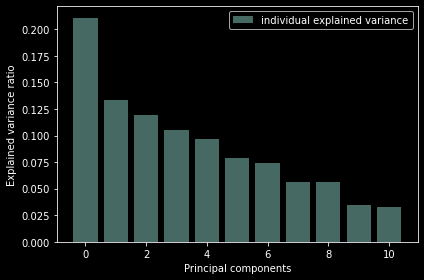

In [13]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(11), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [14]:
#Cumulative variance % retained
pca = PCA() #also this works: PCA(n_components=11)
pca_2 = pca.fit(scaled_data)
variance_retained_ratio=pca_2.explained_variance_ratio_.cumsum()
variance_retained_ratio

array([0.21105318, 0.34465934, 0.46390735, 0.56953971, 0.66590701,
       0.7446634 , 0.81911838, 0.87568209, 0.93196033, 0.96688075,
       1.        ])

In [18]:
print(f'Variance retained by PC=1 {variance_retained_ratio[0]}')
print(f'Variance retained by PCs=2 {variance_retained_ratio[1]}')
print(f'Variance retained by PCs=3 {variance_retained_ratio[2]}')
print(f'Variance retained by PCs=4 {variance_retained_ratio[3]}')

Variance retained by PC=1 0.21105317781254598
Variance retained by PCs=2 0.34465933966978446
Variance retained by PCs=3 0.4639073524169093
Variance retained by PCs=4 0.5695397103454116


In [16]:
#PCA where n=??
pca = PCA(n_components=2)
X = pca.fit_transform(scaled_data)

In [17]:
#Tabular representation of magnitude of each PC in explaining variance in each company
principal_contribution = pd.DataFrame(data = X
             , columns = ['principal component 1', 'principal component 2'])
principal_contribution

,principal component 1,principal component 2
0,-1.366496,-0.289308
1,-0.535508,0.111411
2,-2.074416,7.301868
3,-0.282433,0.155307
4,-1.544990,-0.843898
...,...,...
80,1.762461,-0.290012
81,2.306786,0.309837
82,2.286221,2.668334
83,4.234471,0.077303


In [19]:
new_df = pd.concat([principal_contribution, y_2[['Y_variable']]], axis = 1)
new_df

,principal component 1,principal component 2,Y_variable
0,-1.366496,-0.289308,1
1,-0.535508,0.111411,1
2,-2.074416,7.301868,1
3,-0.282433,0.155307,1
4,-1.544990,-0.843898,1
...,...,...,...
80,1.762461,-0.290012,0
81,2.306786,0.309837,0
82,2.286221,2.668334,0
83,4.234471,0.077303,0


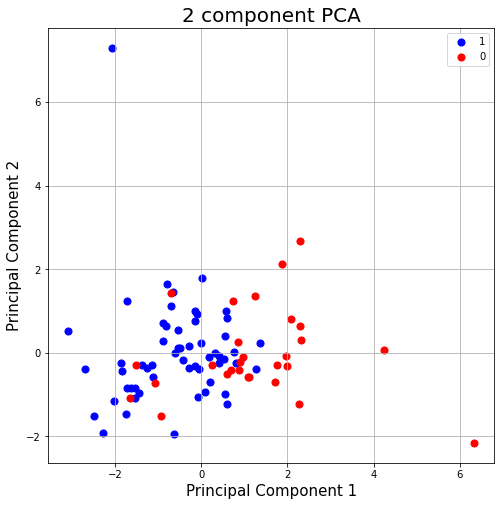

In [20]:
#Classification of the two main groups of companies
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [1, 0]
colors = ['b','r']
for target, color in zip(targets,colors):
    indicesToKeep = new_df['Y_variable'] == target
    ax.scatter(new_df.loc[indicesToKeep, 'principal component 1']
               , new_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
#plt.xlim([-10, 10])
#ax.set_ylim([-10, 10])

In [21]:
#Machine learning using various tools
np.random.seed(20)
#Splitting data into train and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df.iloc[:,:2], new_df.iloc[:,2], test_size = 0.2, random_state=20, stratify=y)
#X or x = new_df.iloc[:,:3] #features
#y or y = new_df.iloc[:,3] #target

In [22]:
#forecasting using a KNeighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(7)

In [23]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [24]:
y_pred = model.predict(X_test)
print(y_pred)
#knc Actual values
y_test

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0]


30    1
32    1
68    0
6     1
11    1
19    1
56    1
13    1
43    1
10    1
46    1
83    0
60    0
55    1
72    0
66    0
77    0
Name: Y_variable, dtype: int64

In [25]:
#knc trading signal
for i in y_pred:
  if (i==0):
    print("sell")
  elif (i==1):
    print("buy")

buy
buy
buy
buy
buy
buy
buy
buy
buy
buy
buy
sell
buy
buy
sell
sell
sell


In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[ 4  2]
 [ 0 11]]
0.8823529411764706


In [27]:
#Forecasting using decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=6)
tree = clf.fit(X_train, y_train)

In [29]:
#dtc Model predictions
tree_predictions = tree.predict(X_test)
print(tree_predictions)
#dtc Actual values
y_test

[1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0]


30    1
32    1
68    0
6     1
11    1
19    1
56    1
13    1
43    1
10    1
46    1
83    0
60    0
55    1
72    0
66    0
77    0
Name: Y_variable, dtype: int64

In [30]:
#How well did the model do on test dataset
print(tree.score(X_test,y_test))

0.8235294117647058


In [31]:
#dtc trading signal
for i in tree_predictions:
  if (i==0):
    print("sell")
  elif (i==1):
    print("buy")

buy
buy
buy
buy
buy
buy
buy
buy
buy
sell
buy
sell
buy
buy
sell
sell
sell


Model performance metrics

In [32]:
#Libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve

In [33]:
#ROC curves
# predict probabilities
lr_probs = tree.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

In [34]:
# calculate ROC AUC scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision tree: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Decision tree: ROC AUC=0.826


In [35]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

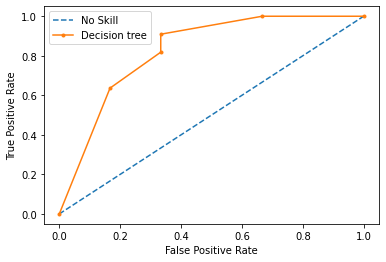

In [36]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [37]:
print('accuracy score', accuracy_score(y_test, tree_predictions))

accuracy score 0.8235294117647058


In [38]:
print('confusion matrix', confusion_matrix(y_test, tree_predictions))

confusion matrix [[ 4  2]
 [ 1 10]]


In [39]:
print('classification report', classification_report(y_test, tree_predictions))

classification report               precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.83      0.91      0.87        11

    accuracy                           0.82        17
   macro avg       0.82      0.79      0.80        17
weighted avg       0.82      0.82      0.82        17



In [40]:
precision, recall, thresholds = precision_recall_curve(y_test, tree_predictions)
print(precision)
print(recall)
print(thresholds)

[0.64705882 0.83333333 1.        ]
[1.         0.90909091 0.        ]
[0 1]
